# Loan Prediction Project
Project for predicting loan status as either Yes[Y] or No[N] Whether the loan application will be approved or not.

### 1. Setting the environment.

In [159]:
# necessary packages needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, Binarizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.linear_model as lm 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### 2. Loading the Data

In [73]:
# the training data sets and testing sets
loan_data_train = pd.read_csv("loan_train")
loan_data_test = pd.read_csv("loan_test")

# making copies of the original datasets
train_original = loan_data_train.copy()
test_original = loan_data_test.copy()

### 3. Understanding the Data

In [74]:
# get to understand your data
loan_data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
# columns of the train sets
loan_data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [76]:
# the shape of the train sets
loan_data_train.shape

(614, 13)

In [77]:
# columns of the test sets
loan_data_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [78]:

# shape of the test data
loan_data_test.shape

(367, 12)

In [79]:
# get to know the datatypes of the training sets
loan_data_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### 4. Exploratory Data Analysis(EDA).

#### 4.1 Univariate Analysis.

##### 4.11 Target Variable

In [80]:
# Understand the Target variable with response to the problem
loan_data_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [81]:
# set normalized to true to see the proportion instead of numbers
loan_data_train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

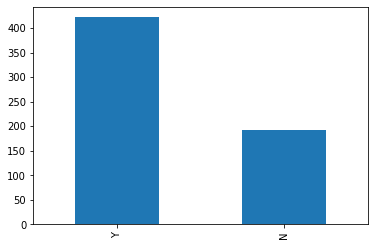

In [82]:
# plot the bar graph for better understanding
loan_data_train.Loan_Status.value_counts().plot.bar()

##### 4.12  Independent Categorical Variable : features that have categories

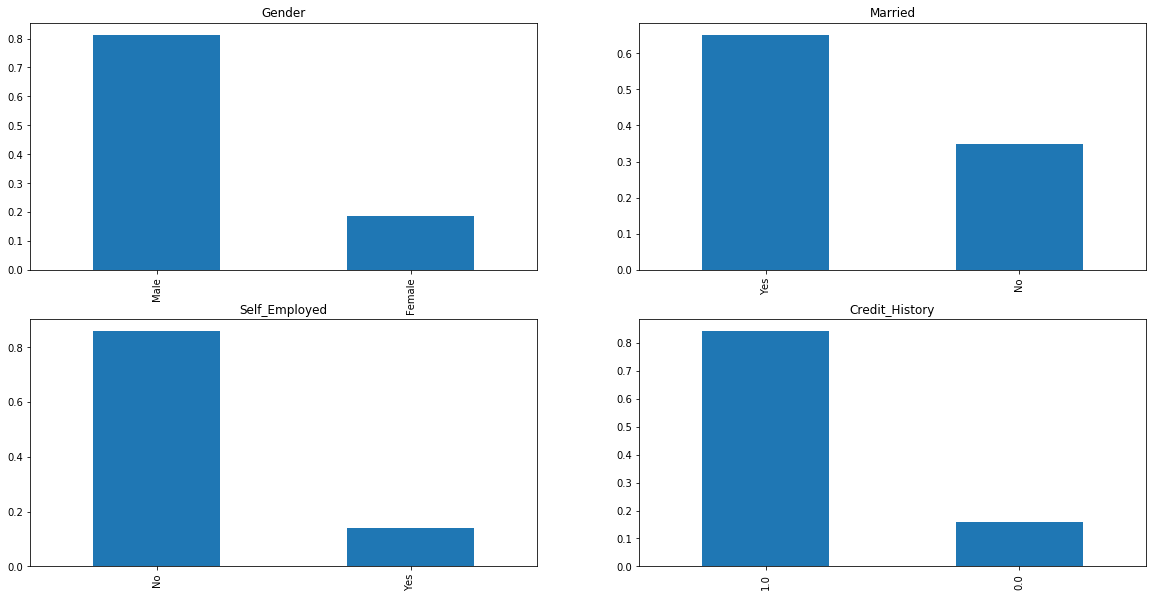

In [83]:
# subplots for the bar graphs of each categorical variable : features have categories
plt.figure(1)

# gender
plt.subplot(221)
loan_data_train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")

# Married
plt.subplot(222)
loan_data_train['Married'].value_counts(normalize=True).plot.bar(title="Married")

# Self_Employed
plt.subplot(223)
loan_data_train['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self_Employed")

# Credit_History
plt.subplot(224)
loan_data_train['Credit_History'].value_counts(normalize=True).plot.bar(title="Credit_History")

##### 4.13 Independent Ordinal Variables. : categorical features having some order involved

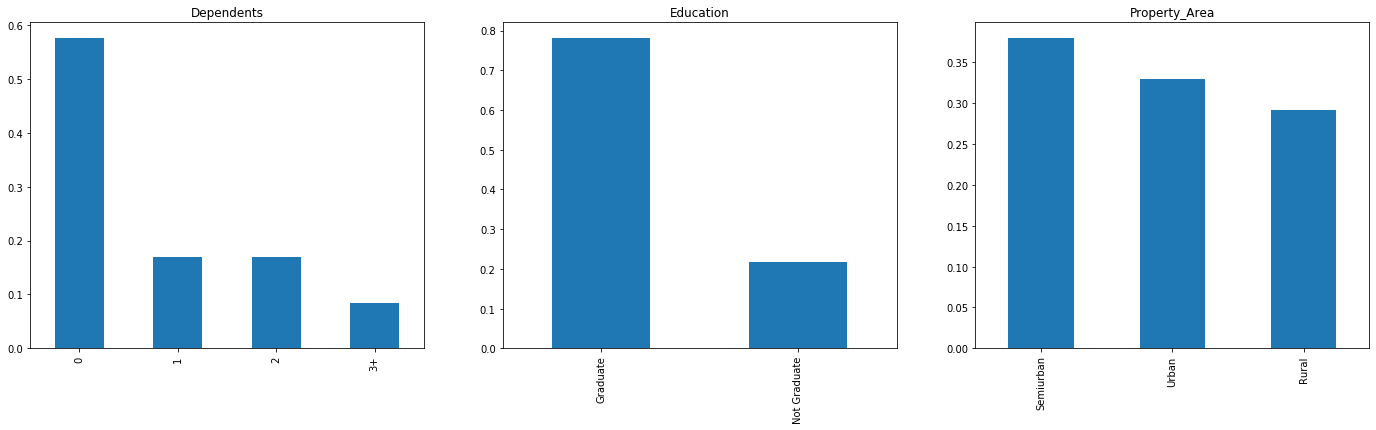

In [84]:
# ordinal variable bar graph
plt.figure(1)

# Dependents
plt.subplot(131)
loan_data_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title="Dependents")

# Education
plt.subplot(132)
loan_data_train['Education'].value_counts(normalize=True).plot.bar(title="Education")

# Property_Area
plt.subplot(133)
loan_data_train['Property_Area'].value_counts(normalize=True).plot.bar(title="Property_Area")

plt.show()

##### 4.14 Independent Numerical Variable

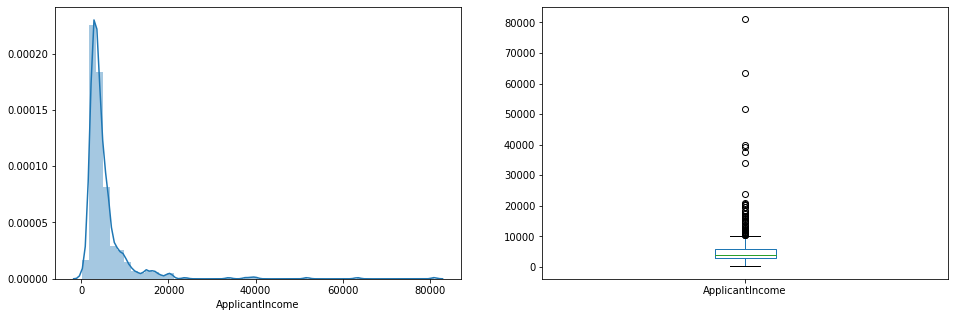

In [85]:
# applicant Income
plt.figure(1)

plt.subplot(121)
sns.distplot(loan_data_train["ApplicantIncome"])

# box plot to show clearly outliers
plt.subplot(122)
loan_data_train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

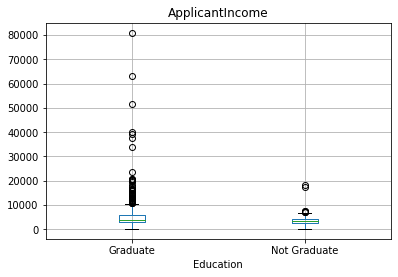

In [86]:
# is outliers caused by educatio level?
loan_data_train.boxplot(column="ApplicantIncome", by="Education")
plt.suptitle("")
# Text(0.5,0.98,'')

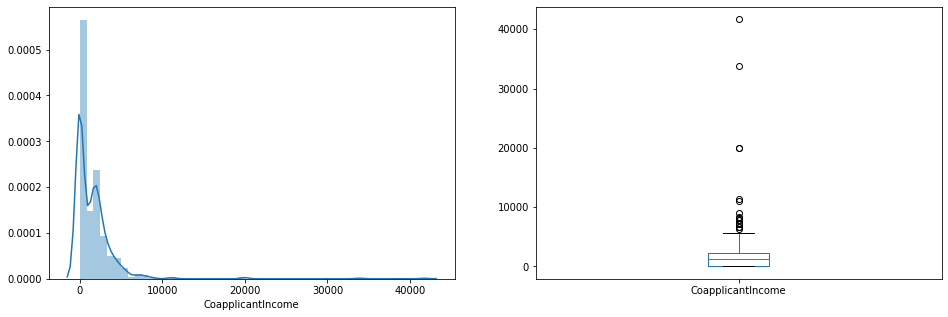

In [87]:
# Coapplicant
plt.figure(1)

plt.subplot(121)
sns.distplot(loan_data_train['CoapplicantIncome'])

plt.subplot(122)
loan_data_train["CoapplicantIncome"].plot.box(figsize=(16,5))

plt.show()

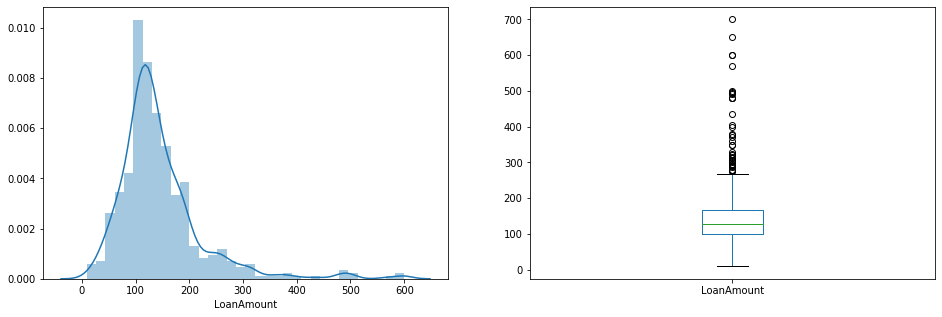

In [88]:
# loan amount
plt.figure(1)

plt.subplot(121)
df=loan_data_train.dropna()

sns.distplot(df["LoanAmount"])

plt.subplot(122)
loan_data_train["LoanAmount"].plot.box(figsize=(16,5))

plt.show()

#### 4.2 Bivariate Analysis

##### 4.21 Categorical Independent Variable Vs Target Variable

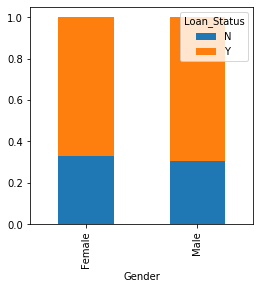

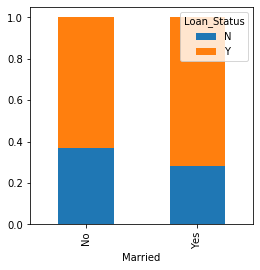

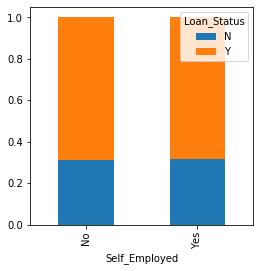

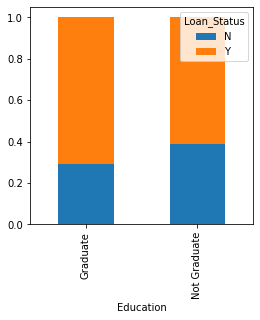

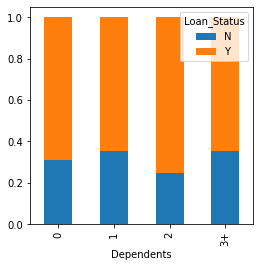

In [89]:
# looking at Loan Status(LS) based on Gender
Gender = pd.crosstab(loan_data_train['Gender'], loan_data_train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# LT with regards to Marriage
Married = pd.crosstab(loan_data_train['Married'], loan_data_train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# LS with regards to Self_Employed
Self_Employed = pd.crosstab(loan_data_train['Self_Employed'], loan_data_train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# LS with regards to Education
Education = pd.crosstab(loan_data_train['Education'], loan_data_train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# LS with regards to Dependents
Dependents = pd.crosstab(loan_data_train['Dependents'], loan_data_train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

plt.show()

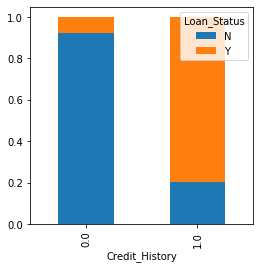

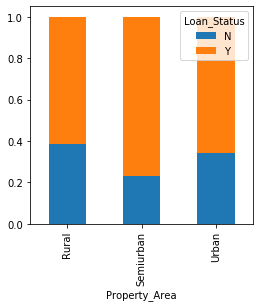

In [90]:
# LS with regards to Credit_History
Credit_History = pd.crosstab(loan_data_train['Credit_History'], loan_data_train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# LS with regards to Property_Area
Property_Area = pd.crosstab(loan_data_train['Property_Area'], loan_data_train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

##### 4.22 Numerical Independent Variable VS Target Variable

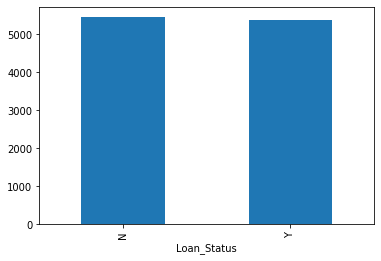

In [91]:
# ApplicantIncome
loan_data_train.groupby("Loan_Status")['ApplicantIncome'].mean().plot(kind="bar")
plt.show()

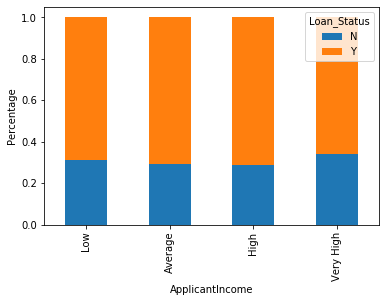

In [92]:
# corresponding loan status depending on value of income
bins = [0,2500,4000,6000,8100]
group = ['Low','Average','High','Very High']

loan_data_train["Income_bin"] = pd.cut(df["ApplicantIncome"], bins, labels=group)

Income_bin = pd.crosstab(loan_data_train['Income_bin'], loan_data_train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel("Percentage")
plt.show()

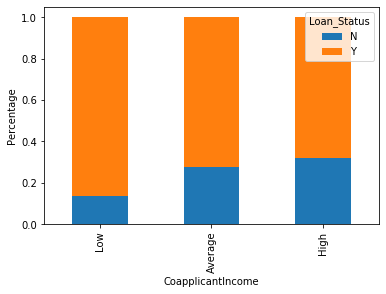

In [93]:
# corresponding loan status depending on value of CoapplicantIncome
bins = [0,1000,3000,4200]
group = ['Low','Average','High']

loan_data_train["CoapplicantIncome_bin"] = pd.cut(loan_data_train["CoapplicantIncome"], bins, labels=group)

CoapplicantIncome_bin = pd.crosstab(loan_data_train['CoapplicantIncome_bin'], loan_data_train['Loan_Status'])
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel("Percentage")
plt.show()

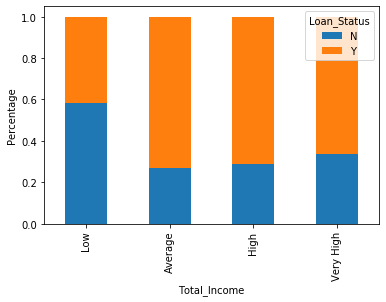

In [94]:
# Combining the Applicant Income and CoApplicant Income
loan_data_train["Total_Income"] = loan_data_train["ApplicantIncome"] + loan_data_train['CoapplicantIncome']

bins = [0,2500,4000,6000,8100]
group = ['Low','Average','High','Very High']

loan_data_train["Total_Income_bin"] = pd.cut(loan_data_train["Total_Income"], bins, labels=group)

Total_Income_bin = pd.crosstab(loan_data_train['Total_Income_bin'], loan_data_train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel("Percentage")
plt.show()


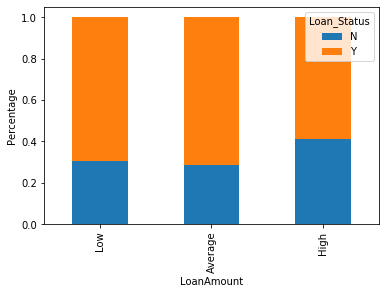

In [95]:
# the loan Amount
bins = [0, 100,200,700]
group = ['Low','Average','High']

loan_data_train["LoanAmount_bin"] = pd.cut(df["LoanAmount"], bins, labels=group)

LoanAmount_bin = pd.crosstab(loan_data_train['LoanAmount_bin'], loan_data_train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel("Percentage")
plt.show()

In [96]:
# # dropping the bins created during exploration
loan_data_train = loan_data_train.drop(['Income_bin', 'CoapplicantIncome_bin', 'LoanAmount_bin',
                                        'Total_Income_bin', 'Total_Income'], axis=1)

# in axis

# loan_data_train = loan_data_train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin',
#                                         'Total_Income_bin', 'Total_Income'], axis=1)
print(loan_data_train.columns)

# changing 3+ in dependents to 3 to make it numerical
loan_data_train["Dependents"].replace('3+', 3, inplace=True)
loan_data_test["Dependents"].replace('3+',3, inplace=True)

# replace the N with 0, and Y with 1 in LS
loan_data_train['Loan_Status'].replace('N',0,inplace=True)
loan_data_train['Loan_Status'].replace('Y', 1, inplace=True)
print(loan_data_train["Dependents"])

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object


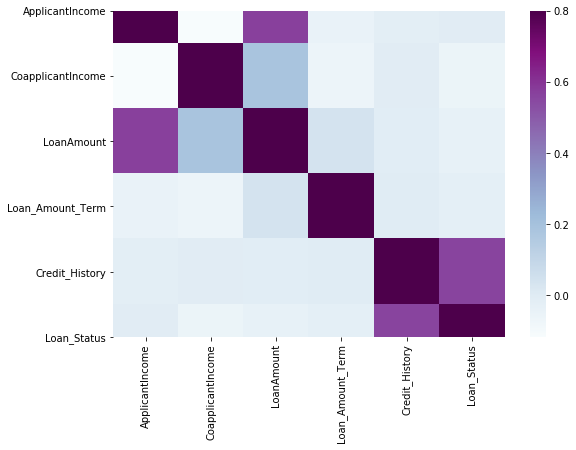

In [97]:
# Looking at the correlation between the numerical values
matrix = loan_data_train.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")
plt.show()




### 5. Missing Vaues and Outliers Treatment

In [98]:

# the missing values
loan_data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### 5.1 Imputation of Categorical variable by Mode

In [99]:
# Gender
loan_data_train["Gender"].fillna(loan_data_train['Gender'].mode()[0], inplace=True)

# Married
loan_data_train["Married"].fillna(loan_data_train['Married'].mode()[0], inplace=True)

# Dependents
loan_data_train["Dependents"].fillna(loan_data_train['Dependents'].mode()[0], inplace=True)

# Self_Employed
loan_data_train["Self_Employed"].fillna(loan_data_train['Self_Employed'].mode()[0], inplace=True)

# Credit_History
loan_data_train["Credit_History"].fillna(loan_data_train['Credit_History'].mode()[0], inplace=True)

##### 5.2 Imputation of numerical data 

In [100]:
# Loan Amount Terms
loan_data_train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [101]:
# imputing with median
loan_data_train['Loan_Amount_Term'].fillna(loan_data_train['Loan_Amount_Term'].mode()[0], inplace=True)

In [102]:
# imputing with mode
loan_data_train['LoanAmount'].fillna(loan_data_train['LoanAmount'].median(), inplace=True)

In [103]:

# Confirm the new data
loan_data_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### 5.3 Perform imputation for Test Data 

In [104]:
loan_data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [105]:


# Gender
loan_data_test["Gender"].fillna(loan_data_test['Gender'].mode()[0], inplace=True)

# Dependents
loan_data_test["Dependents"].fillna(loan_data_test['Dependents'].mode()[0], inplace=True)

# Self_Employed
loan_data_test["Self_Employed"].fillna(loan_data_test['Self_Employed'].mode()[0], inplace=True)

# Credit_History
loan_data_test["Credit_History"].fillna(loan_data_test['Credit_History'].mode()[0], inplace=True)

# imputing with median
loan_data_test['Loan_Amount_Term'].fillna(loan_data_test['Loan_Amount_Term'].mode()[0], inplace=True)

# imputing with mode
loan_data_test['LoanAmount'].fillna(loan_data_test['LoanAmount'].median(), inplace=True)

##### 5.4 Outliers Treatment

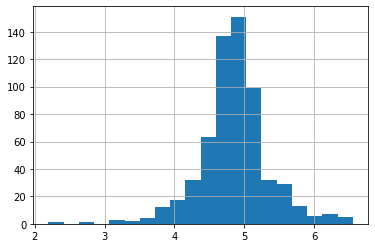

In [106]:
# performing log transformation to remove skewness
loan_data_train['LoanAmount_log'] = np.log(loan_data_train['LoanAmount'])

# histogram
loan_data_train['LoanAmount_log'].hist(bins=20)

# perfoming log transformation for the test data
loan_data_test['LoanAmount_log'] = np.log(loan_data_test['LoanAmount'])

In [110]:
loan_data_train.shape, loan_data_test.shape

((614, 13), (367, 12))

### 6. Model Building


In [111]:
# Dropping the Loan_Id variable since they dont affect Loan_Status
loan_data_train = loan_data_train.drop(['Loan_ID'], axis=1)
loan_data_test = loan_data_test.drop(['Loan_ID'],axis=1)

KeyError: "['Loan_ID'] not found in axis"

In [112]:
# Separating Target Variable with Features
X = loan_data_train.drop(['Loan_Status'], axis=1)
y = loan_data_train['Loan_Status']

In [113]:
#applying dummies variable to categorical variable to change them into 0s and 1s
X = pd.get_dummies(X)
loan_data_train = pd.get_dummies(loan_data_train)
loan_data_test = pd.get_dummies(loan_data_test)

# training and validation sets
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

 ##### 6.1 Logistic Regression

In [114]:
# the model
model = lm.LogisticRegression()
model.fit(x_train,y_train)

# Regularization
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100
                  ,multi_class='ovr', n_jobs=1, penalty='l2', random_state=1, solver='liblinear', tol = 0.0001
                  ,verbose=0, warm_start=False)

#predict loan status
pred_cv = model.predict(x_cv)

# accurracy of our model
accuracy_score(y_cv, pred_cv)

0.772972972972973

In [115]:

loan_data_test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [116]:

# making prediction to the test
pred_test = model.predict(loan_data_test)

In [117]:

loan_data_test.shape, X.shape

((367, 21), (614, 21))

In [118]:
# importing the submission file
submission = pd.read_csv("sample_submission_49d68Cx.csv")

In [119]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [120]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace= True)

In [121]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv', index_label=False)

#### 6.2 Logistic Regression using Stratified k-fold cross validation 

In [154]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i, kf.n_splits))

    # train & validate
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]

    # model
    model_kf = lm.LogisticRegression(random_state=1)
    model_kf.fit(xtr, ytr)

    pred_test1 = model_kf.predict(xvl)
    score1 = accuracy_score(yvl, pred_test1)

    print('accuracy score', score1)
    i += 1

    # predicting the test data
    pred_test1 = model_kf.predict(loan_data_test)
    pred_ = model_kf.predict_proba(xvl)[:,1]


 1 of kfold 5
accuracy score 0.8064516129032258

 2 of kfold 5
accuracy score 0.8064516129032258

 3 of kfold 5
accuracy score 0.8032786885245902

 4 of kfold 5
accuracy score 0.7868852459016393

 5 of kfold 5
accuracy score 0.8360655737704918


In [123]:
# submission
submission['Loan_Status'] = pred_test1
submission['Loan_ID'] = test_original['Loan_ID']

In [124]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace= True)

In [125]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic1.csv', index_label=False)

### 7. Feature Engineering

In [126]:
# combining the Applicant Income with the Coapplicant income To create Total Income
# This is due to what we saw at the bivariate analysis
loan_data_train['Total_Income'] = loan_data_train['ApplicantIncome'] + loan_data_train['CoapplicantIncome']
loan_data_test['Total_Income'] = loan_data_test['ApplicantIncome'] + loan_data_test['CoapplicantIncome']


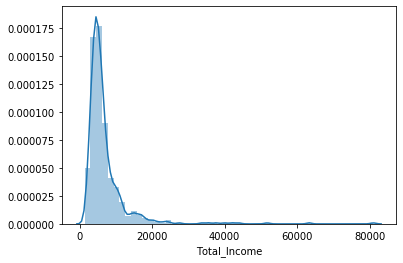

In [127]:
# plot with seaborn
sns.distplot(loan_data_train['Total_Income'])
plt.show()

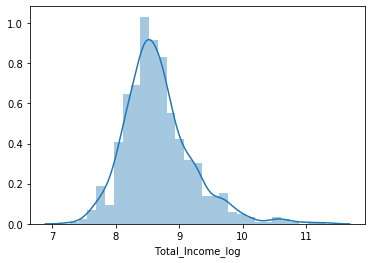

In [128]:
# the distribution above is right skewewd
# taking the log tranformation to make the distribution normal
loan_data_train['Total_Income_log'] = np.log(loan_data_train['Total_Income'])
sns.distplot(loan_data_train['Total_Income_log'])
plt.show()

loan_data_test['Total_Income_log'] = np.log(loan_data_test['Total_Income'])

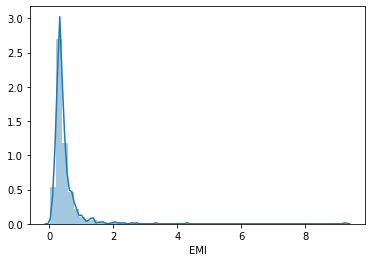

In [129]:
# EMI --> The amount of the loan to be repaid monthly == loan amount/ loan amount term
loan_data_train['EMI'] = loan_data_train['LoanAmount'] / loan_data_train['Loan_Amount_Term']
loan_data_test['EMI'] = loan_data_test['LoanAmount'] / loan_data_test['Loan_Amount_Term']

# plot
sns.distplot(loan_data_train['EMI'])
plt.show()

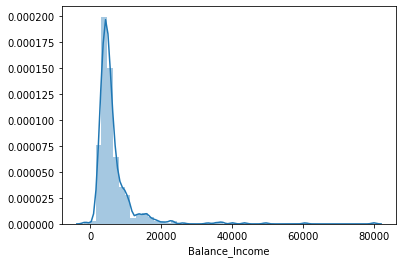

In [130]:
# Balance Income --> The amount left after EMI has been paid
# multiply EMI by 1000 to make the units equal
loan_data_train['Balance_Income'] = loan_data_train['Total_Income']-(loan_data_train['EMI']*1000)
loan_data_test['Balance_Income'] = loan_data_test['Total_Income']-(loan_data_test['EMI']*1000)

# plotting
sns.distplot(loan_data_train['Balance_Income'])
plt.show()

In [131]:
# dropping the features used to create the new datasets --> so as to remove the noise in the datasets
loan_data_train = loan_data_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
                                       ,axis=1)

loan_data_test = loan_data_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
                                     ,axis=1)

In [132]:
loan_data_test.columns, loan_data_train.columns

(Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
        'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
        'Dependents_1', 'Dependents_2', 'Education_Graduate',
        'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
        'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
        'Total_Income', 'Total_Income_log', 'EMI', 'Balance_Income'],
       dtype='object'),
 Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
        'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
        'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
        'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
        'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
        'Total_Income', 'Total_Income_log', 'EMI', 'Balance_Income'],
       dtype='object'))

### 8. Model Building --> Part 2

In [133]:
# preparing the data to feed into the model
X = loan_data_train.drop('Loan_Status', axis=1)
y = loan_data_train['Loan_Status']

#### 8.4 Logistic Regression

In [155]:
i = 1
kf2 = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

#model within a loop
for train_index,test_index in kf2.split(X,y):
    print("\n{} of kfold{}".format(i,kf2.n_splits))
    
#     training & validating
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
#     model
    model_kf2 = lm.LogisticRegression(random_state=1)
    model_kf2.fit(xtr,ytr)
    pred_kf2 = model_kf2.predict(xvl)
    score_kf2 = accuracy_score(yvl, pred_kf2)
    
    print('accuracy_score',score_kf2)
    i +=1
    
#     prediction on the test
    pred_test1 = model_kf2.predict(loan_data_test)
    pred = model_kf2.predict(xvl)[:1]


1 of kfold5
accuracy_score 0.8064516129032258

2 of kfold5
accuracy_score 0.8064516129032258

3 of kfold5
accuracy_score 0.8032786885245902

4 of kfold5
accuracy_score 0.7868852459016393

5 of kfold5
accuracy_score 0.8360655737704918


In [135]:
# making the submission
submission['Loan_Status'] = pred_test1
submission['Loan_ID'] = test_original['Loan_ID']

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

# converting the submission to .csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic_3.csv', index_label=False)

#### 8.5 Decision Tree

In [136]:
i = 1
dt = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

#model within a loop
for train_index,test_index in dt.split(X,y):
    print("\n{} of kfold{}".format(i,dt.n_splits))
    
#     training & validating
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
#     model
    model_dt = DecisionTreeClassifier(random_state=1)
    model_dt.fit(xtr,ytr)
    pred_dt = model_dt.predict(xvl)
    score_kf2 = accuracy_score(yvl, pred_dt)
    
    print('accuracy_score',score_kf2)
    i +=1
    
#     prediction on the test
    pred_test2 = model_dt.predict(loan_data_test)
    pred2 = model_dt.predict(xvl)[:1]


1 of kfold5
accuracy_score 0.75

2 of kfold5
accuracy_score 0.75

3 of kfold5
accuracy_score 0.6721311475409836

4 of kfold5
accuracy_score 0.6967213114754098

5 of kfold5
accuracy_score 0.7049180327868853


In [137]:
# take note that of how worse the results fro decision tree is
# making the submission
submission['Loan_Status'] = pred_test2
submission['Loan_ID'] = test_original['Loan_ID']

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

# converting the submission to .csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('dtree.csv', index_label=False)

#### 8.6 Random Forest

In [138]:
i = 1
rf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

#model within a loop
for train_index,test_index in rf.split(X,y):
    print("\n{} of kfold{}".format(i,rf.n_splits))
    
#     training & validating
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
#     model
    model_rf = RandomForestClassifier(random_state=1)
    model_rf.fit(xtr,ytr)
    pred_rf = model_rf.predict(xvl)
    score_rf = accuracy_score(yvl, pred_rf)
    
    print('accuracy_score',score_rf)
    i +=1
    
#     prediction on the test
    pred_test4 = model_rf.predict(loan_data_test)
    pred4 = model_rf.predict(xvl)[:1]


1 of kfold5
accuracy_score 0.8064516129032258

2 of kfold5
accuracy_score 0.782258064516129

3 of kfold5
accuracy_score 0.7622950819672131

4 of kfold5
accuracy_score 0.7131147540983607

5 of kfold5
accuracy_score 0.8278688524590164


#### 8.61 Tuning the hyperparameters using grid Search

In [141]:
# providing no. of max_depth from 1-20 withintevals of 2 and 1-200 for no of estimators with intervals of 20
paramgrid = {"max_depth": list(range(1,20,2)), 'n_estimators' : list(range(1,200,20))}

# the grid_search
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

# splitting
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)

# fit the grid search model
grid_search.fit(x_train,y_train)

# tuning
# GridSearchCV(cv=None, error_score='raise', estimator=RandomForestClassifier(bootstrap=True, class_weight=None
#                 , criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None,
#                 min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,min_samples_split=2
#                 , min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
#                 verbose=0, warm_start=False),fit_params=None, iid=True, n_jobs=1, 
#              param_grid={'max_depth' : [1,
#                 3,5,7,9,11,13,15,17,19], 'n_estimators': [1,21,41,61,81,101,121,141,161,181]},
#             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn', scoring=None, verbose=0)

# estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=141,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [146]:
# building the model using the optimized values
i = 1
rf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

#model within a loop
for train_index,test_index in rf.split(X,y):
    print("\n{} of kfold{}".format(i,rf.n_splits))
    
#     training & validating
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
#     model
    model_rf1 = RandomForestClassifier(max_depth=3,n_estimators=141,random_state=1, min_samples_leaf=1)
    model_rf1.fit(xtr,ytr)
    pred_rf1 = model_rf1.predict(xvl)
    score_rf1 = accuracy_score(yvl, pred_rf1)
    
    print('accuracy_score',score_rf1)
    i +=1
    
#     prediction on the test
    pred_test5 = model_rf1.predict(loan_data_test)
    pred5 = model_rf1.predict(xvl)[:1]


1 of kfold5
accuracy_score 0.8145161290322581

2 of kfold5
accuracy_score 0.7983870967741935

3 of kfold5
accuracy_score 0.7950819672131147

4 of kfold5
accuracy_score 0.7950819672131147

5 of kfold5
accuracy_score 0.8442622950819673


In [147]:
# making the submission
submission['Loan_Status'] = pred_test5
submission['Loan_ID'] = test_original['Loan_ID']

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

# converting the submission to .csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic_5.csv', index_label=False)

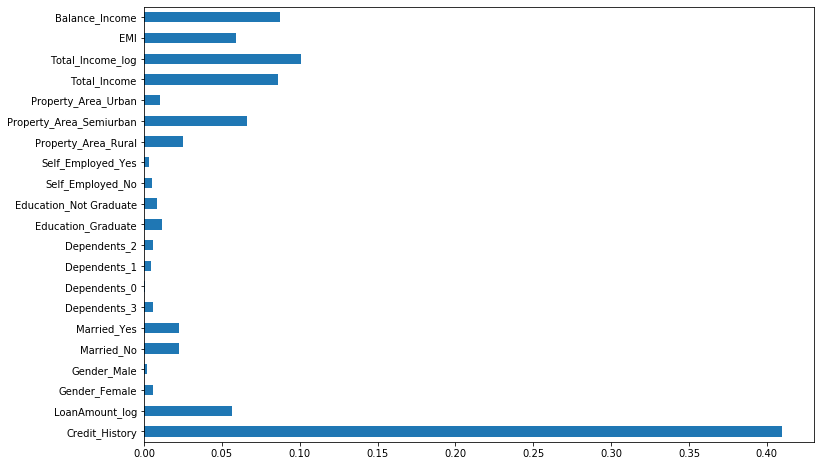

In [158]:
# checking the importances of various features
importances = pd.Series(model_rf1.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
plt.show()

#### 8.7  XGBoost

In [161]:
i = 1
rf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

#model within a loop
for train_index,test_index in rf.split(X,y):
    print("\n{} of kfold{}".format(i,rf.n_splits))
    
#     training & validating
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
#     model
    model_rf = XGBClassifier(random_state=1)
    model_rf.fit(xtr,ytr)
    pred_rf = model_rf.predict(xvl)
    score_rf = accuracy_score(yvl, pred_rf)
    
    print('accuracy_score',score_rf)
    i +=1
    
#     prediction on the test
    pred_test6 = model_rf.predict(loan_data_test)
    pred6 = model_rf.predict(xvl)[:1]


1 of kfold5
accuracy_score 0.7983870967741935

2 of kfold5
accuracy_score 0.7983870967741935

3 of kfold5
accuracy_score 0.7786885245901639

4 of kfold5
accuracy_score 0.7868852459016393

5 of kfold5
accuracy_score 0.8278688524590164


In [162]:
# making the submission
submission['Loan_Status'] = pred_test6
submission['Loan_ID'] = test_original['Loan_ID']

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

# converting the submission to .csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic_6.csv', index_label=False)